# <div style="text-align:center">XGBoost Heart Disease</div>

In [ ]:
# pip install xgboost

In [46]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import precision_score
import sklearn

In [47]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
lables = data['target'].unique()

In [49]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 13].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [51]:
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'heartـtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'heartـtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('heartـtrain.svm')
dtest_svm = xgb.DMatrix('heartـtest.svm')

[11:19:53] 242x13 matrix with 2226 entries loaded from heartـtrain.svm
[11:19:53] 61x13 matrix with 568 entries loaded from heartـtest.svm


In [52]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [53]:
bst = xgb.train(param, dtrain_svm, num_round)

In [54]:
bst.dump_model('heartـdump.raw.txt')

In [55]:
preds = bst.predict(dtest_svm)

In [56]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [57]:
print(precision_score(y_test, best_preds, average='macro'))

0.8193548387096774


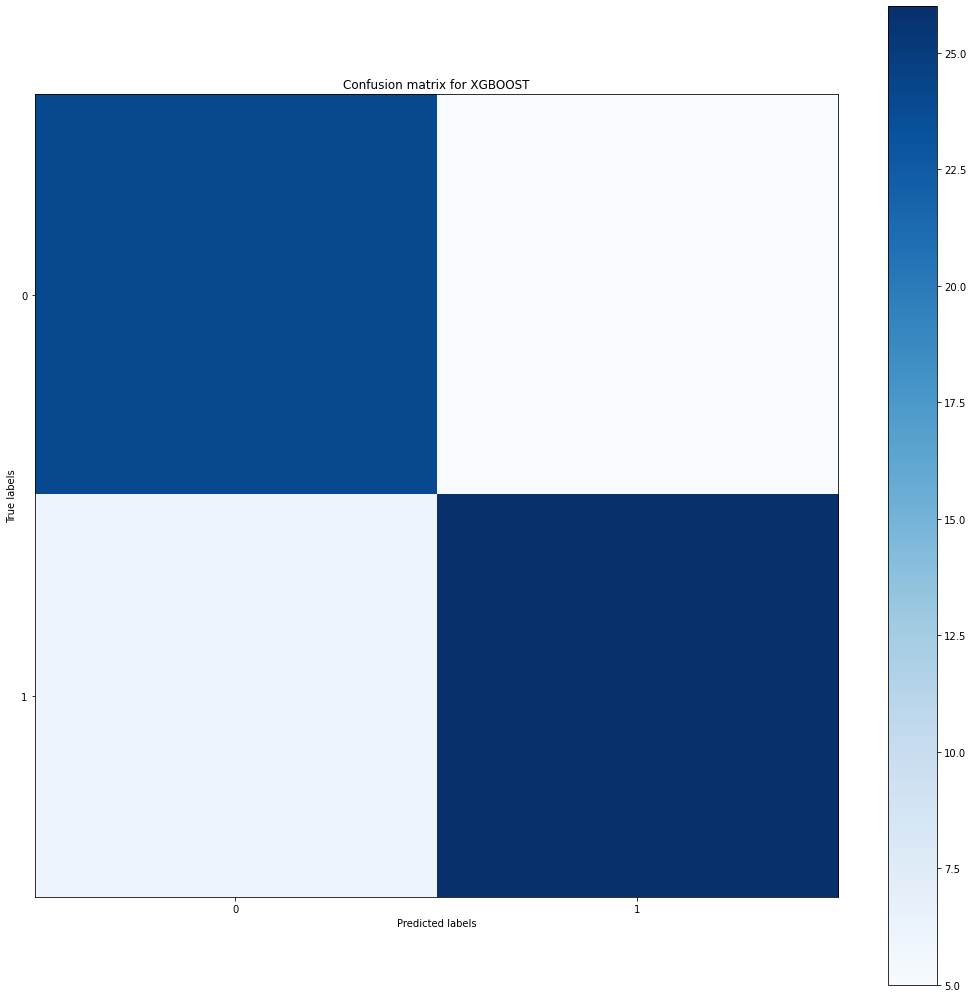

In [60]:
lables = [0,1]

y_pred = (best_preds > 0.5)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(18, 18))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(list(range(0,len(lables))), lables )
plt.yticks(list(range(0,len(lables))), lables)
plt.title('Confusion matrix for XGBOOST')
plt.colorbar()